# Вишинська Наталія, група ОІ-21сп, варіант 3, ЛР №1
## Бізнес-цілі:
### Підвищення рівня усиновлення тварин:

#### Ціль моделювання: Розробка системи машинного навчання для ефективного прогнозування швидкості усиновлення тварин на основі їх фізичних характеристик та стану здоров’я.

#### Критерії успіху:

- Алгоритм повинен точно передбачати, з якою швидкістю буде усиновлена тварина, спираючись на такі фактори, як вік, порода, стать та інші характеристики.
- Система повинна враховувати всі дані без втрат інформації та забезпечувати коректну класифікацію тварин.
- Результати моделювання повинні відповідати реальним статистичним даним про усиновлення, підтверджуючи їх точність.
- Покращення розуміння факторів, що впливають на усиновлення тварин:

#### Ціль моделювання: Аналіз впливу різних факторів на швидкість усиновлення, таких як розмір, стан здоров’я, стерилізація, наявність вакцинацій тощо.

#### Критерії успіху:

- Модель повинна надавати чіткі висновки щодо ключових факторів, які впливають на швидкість усиновлення.
- На основі аналізу будуть формуватися рекомендації для притулків, що допоможуть прискорити процес усиновлення тварин.
- Підвищення точності даних дозволить робити більш обґрунтовані висновки та рішення щодо управління процесом усиновлення.
- Оптимізація управління тваринами у притулках:

#### Ціль моделювання: Забезпечити систему підтримки для персоналу притулків, яка полегшить процес прогнозування та управління потоком тварин.

#### Критерії успіху:

- Система повинна надавати зрозумілі та точні дані про ймовірність швидкого усиновлення кожної тварини, що допоможе краще планувати розподіл ресурсів.
- Інтерфейс та функціонал системи повинні бути зручними для використання персоналом притулків без потреби в спеціальних технічних знаннях.
- Результати аналізу повинні використовуватися для покращення процесів догляду та обліку тварин, а також для підготовки звітів про роботу притулків.
#### Переклад назв стовпців:
- Type – Тип тварини
- Name – Ім'я
- Age – Вік
- Gender – Стать
- MaturitySize – Розмір дорослої особини
- FurLength – Довжина шерсті
- Vaccinated – Вакцинований
- Dewormed – Проглистований
- Sterilized – Стерилізований
- Health – Стан здоров'я
- Quantity – Кількість
- Fee – Вартість
- State – Штат
- RescuerID – Ідентифікатор рятувальника
- VideoAmt – Кількість відео
- Description – Опис
- PetID – Ідентифікатор тварини
- PhotoAmt – Кількість фото
- AdoptionSpeed – Швидкість усиновлення
- ColorName_x – Основний колір
- ColorName_y – Додатковий колір
- ColorName – Колір
- BreedName_x – Порода
- BreedName_y – Додаткова порода
- StateName_x – Назва штату

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Завантаження даних

In [4]:
data = pd.read_csv("./variant_3.csv")

# Переглянемо перші рядки даних

In [6]:
data.head()

,Unnamed: 0,Type,Name,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,...,Description,PetID,PhotoAmt,AdoptionSpeed,ColorName_x,ColorName_y,ColorName,BreedName_x,BreedName_y,StateName_x
0,0,2,Golden Tabby Girl,1,2.0,NaN,1,2,1,2,...,A cute tabby kitten looking for new home. She ...,dae13a47e,7.0,1,Brown,Golden,NaN,Tabby,Domestic Short Hair,Selangor
1,1,2,Ogen & Oyen,2,3.0,1.0,2,2,2,2,...,Ogen (male) & Oyen (female) are about 2 months...,718b14a08,2.0,1,Brown,Golden,Cream,Domestic Medium Hair,Domestic Short Hair,Selangor
2,2,2,Noah And Nellie,2,3.0,1.0,1,1,1,2,...,"Once again, thanks to petfinder, Noah and Nell...",4a590a1cc,5.0,1,Brown,Golden,Cream,Tabby,Tabby,Selangor
3,3,2,Money,1,2.0,1.0,1,3,3,3,...,Please adopt this cute little kitten... I eant...,19982272a,4.0,4,Brown,Golden,Cream,Domestic Short Hair,Domestic Medium Hair,Selangor
4,4,1,Karlo,2,1.0,2.0,2,2,2,2,...,"Meet Karlo, brother of little Karla, the cutes...",f61c4cead,1.0,3,Brown,Golden,Cream,Mixed Breed,Mixed Breed,Selangor


# Перевірка відсутніх значень

In [8]:
print("Чи є пропущені значення:", data.isnull().values.any())

Чи є пропущені значення: True


# Інформація про дані

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1356 non-null   int64  
 1   Type           1356 non-null   int64  
 2   Name           1244 non-null   object 
 3   Age            1356 non-null   int64  
 4   Gender         1289 non-null   float64
 5   MaturitySize   1221 non-null   float64
 6   FurLength      1356 non-null   int64  
 7   Vaccinated     1356 non-null   int64  
 8   Dewormed       1356 non-null   int64  
 9   Sterilized     1356 non-null   int64  
 10  Health         1356 non-null   int64  
 11  Quantity       1356 non-null   int64  
 12  Fee            1356 non-null   int64  
 13  State          1356 non-null   int64  
 14  RescuerID      1356 non-null   object 
 15  VideoAmt       1356 non-null   int64  
 16  Description    1356 non-null   object 
 17  PetID          1356 non-null   object 
 18  PhotoAmt

# Аналіз даних
## Візуалізація кількості усиновлених тварин за типом тварини

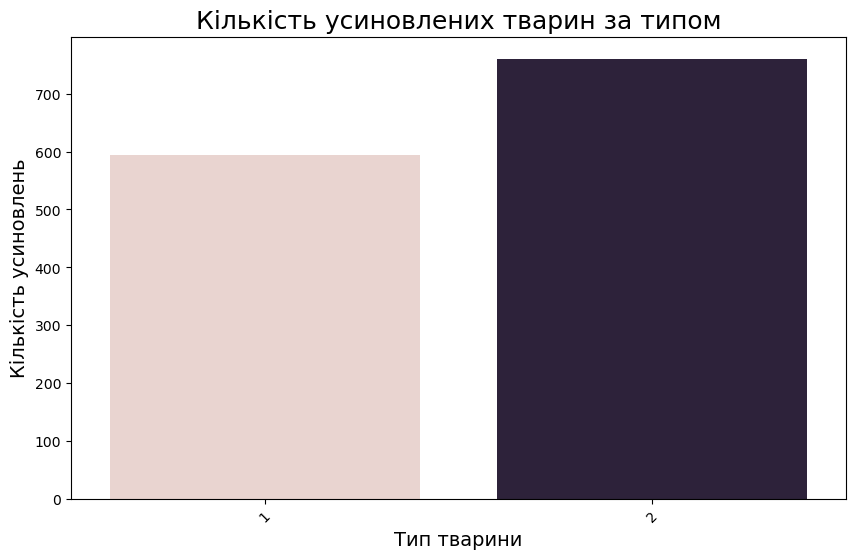

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Type', hue='Type', legend=False)  # Додано hue для уникнення попередження
plt.title('Кількість усиновлених тварин за типом', fontsize=18)
plt.xlabel('Тип тварини', fontsize=14)
plt.ylabel('Кількість усиновлень', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Розподіл віку тварин для усиновлення

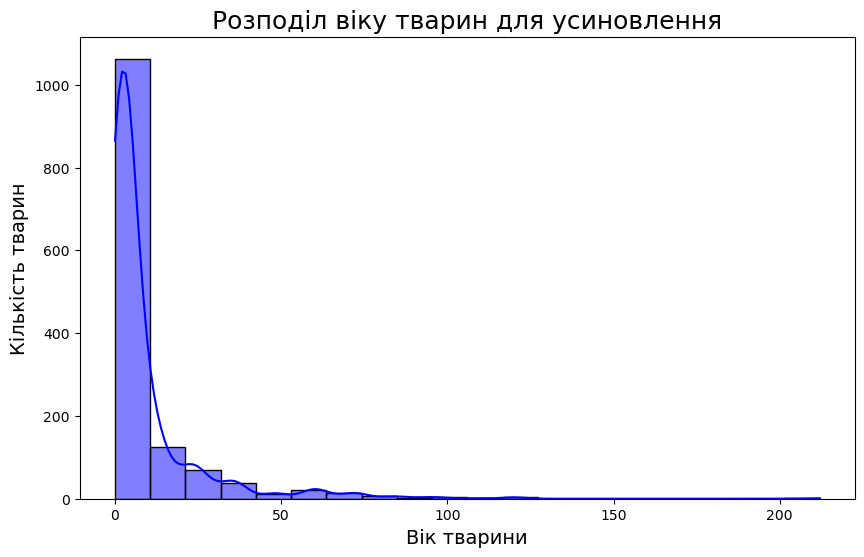

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', kde=True, bins=20, color='blue')
plt.title('Розподіл віку тварин для усиновлення', fontsize=18)
plt.xlabel('Вік тварини', fontsize=14)
plt.ylabel('Кількість тварин', fontsize=14)
plt.show()

# Розподіл усиновлених за статтю тварин

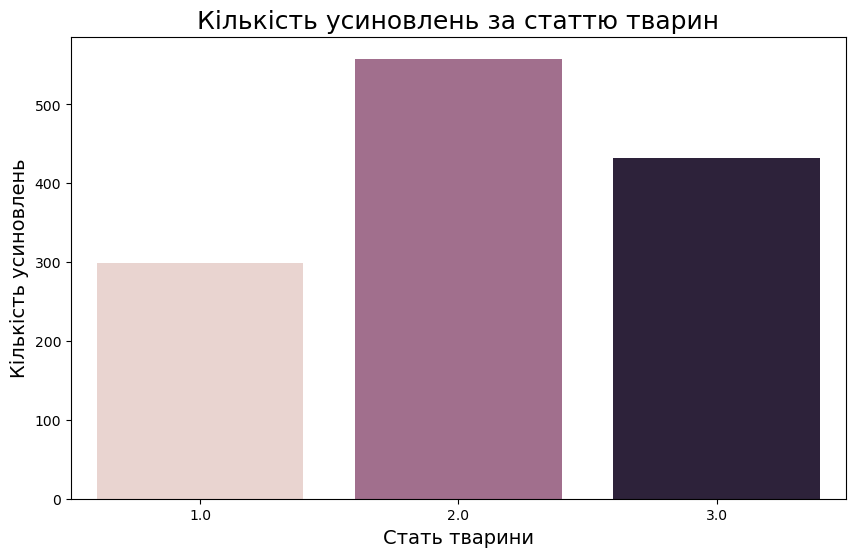

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Gender', legend=False)  
plt.title('Кількість усиновлень за статтю тварин', fontsize=18)
plt.xlabel('Стать тварини', fontsize=14)
plt.ylabel('Кількість усиновлень', fontsize=14)
plt.show()

# Розподіл усиновлених тварин за породою

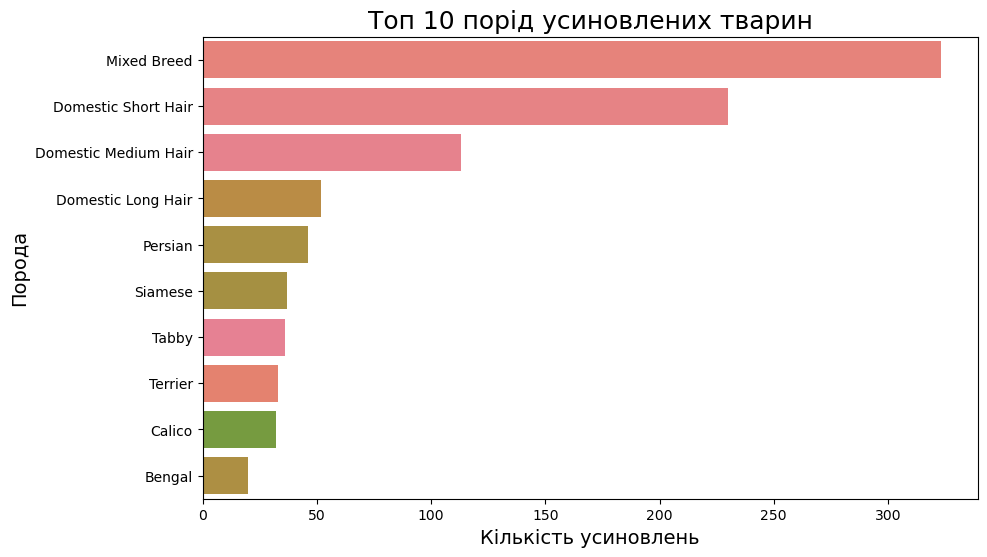

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='BreedName_x', order=data['BreedName_x'].value_counts().index[:10], hue='BreedName_x', legend=False) 
plt.title('Топ 10 порід усиновлених тварин', fontsize=18)
plt.xlabel('Кількість усиновлень', fontsize=14)
plt.ylabel('Порода', fontsize=14)
plt.show()

## Кореляційна матриця ознак

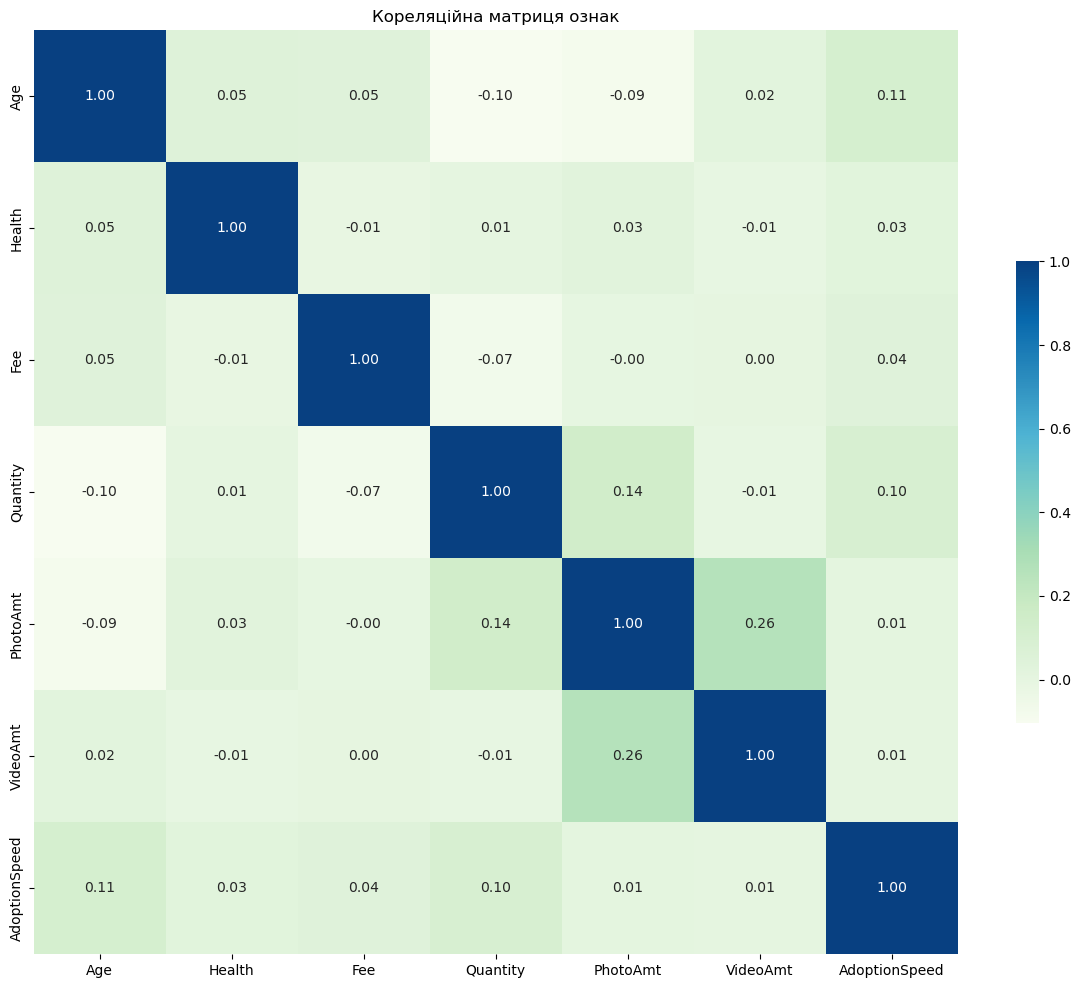

In [21]:
correlation_cols = ['Age', 'Health', 'Fee', 'Quantity', 'PhotoAmt', 'VideoAmt', 'AdoptionSpeed']
plt.rcParams["figure.figsize"] = (15, 12)
correlation_matrix = data[correlation_cols].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True
)
plt.title('Кореляційна матриця ознак', fontsize=12)
plt.show()


## Висновок
- У даній лабораторній роботі було проведено аналіз даних усиновлення тварин з метою виявлення тенденцій серед різних порід. Найбільша кількість усиновлених тварин припала на породи Mixed Breed, Domestic Short Hair, Domestic Medium Hair, Domestic Long Hair та Persian, що свідчить про їхню популярність серед потенційних усиновлювачів.

- Були побудовані графіки, які відобразили співвідношення статей тварин усіх видів, в яких виявлено, що в деяких порід є явна перевага одної зі статей+. Це підтверджують додаткові діаграми, які ілюструють кількість особин за статтю та породою.

- Загалом, проведений аналіз дає можливість краще розуміти фактори, що впливають на усиновлення тварин, та може слугувати основою для подальших досліджень у цій галузі.